In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\irish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def formatDates(data, position):
    dates = []
    for index, row in data.iterrows():
        dates.append(str(row[position])[:8] + '01')
    return dates

In [3]:
farmerData = pd.read_csv('data/IFA_Search_data.csv', parse_dates=['Date'])
consumerData = pd.read_csv('data/ExaminerSearchArticles.csv', parse_dates=['Date'])

In [4]:
farmerData['clean_text'] = farmerData['Text'].apply(lambda x : " ".join(x.lower() for x in x.split()))
farmerData['clean_text'] = farmerData['clean_text'].str.replace("[^\w\s]", "")
farmerData['farmer_sentiment'] = farmerData['clean_text'].apply(lambda x : TextBlob(x).sentiment[0])

In [5]:
consumerData['clean_text'] = consumerData['Text'].apply(lambda x : " ".join(x.lower() for x in x.split()))
consumerData['clean_text'] = consumerData['clean_text'].str.replace("[^\w\s]", "")
consumerData['consumer_sentiment'] = consumerData['clean_text'].apply(lambda x : TextBlob(x).sentiment[0])

In [6]:
farmerData = farmerData.resample('M', on='Date').mean()
farmerData.reset_index(inplace=True)

farmerData.Date = formatDates(farmerData, 0)
farmerData.Date = pd.to_datetime(farmerData.Date)
farmerData.set_index('Date', inplace=True)
farmerData.dropna(inplace=True)
farmerData

,farmer_sentiment
Date,
2010-11-01,0.007835
2011-01-01,0.037752
2011-02-01,0.089827
2011-03-01,0.047175
2011-04-01,-0.120278
...,...
2022-01-01,0.066922
2022-02-01,0.104565
2022-03-01,0.077841


In [7]:
consumerData = consumerData.resample('M', on='Date').mean()
consumerData.reset_index(inplace=True)

consumerData.Date = formatDates(consumerData, 0)
consumerData.Date = pd.to_datetime(consumerData.Date)
consumerData.set_index('Date', inplace=True)
consumerData.dropna(inplace=True)
consumerData

,consumer_sentiment
Date,
2002-07-01,0.093442
2002-08-01,0.065044
2002-09-01,0.118545
2002-10-01,0.064515
2002-11-01,0.067729
...,...
2022-01-01,0.114890
2022-02-01,0.007873
2022-03-01,0.086481


In [8]:
allSentiment = pd.concat([consumerData, farmerData], axis=1)
allSentiment.dropna(inplace=True)
allSentiment

,consumer_sentiment,farmer_sentiment
Date,,
2010-11-01,-0.013120,0.007835
2011-01-01,0.242857,0.037752
2011-03-01,-0.083785,0.047175
2016-04-01,0.068302,-0.043568
2017-01-01,0.152916,0.051089
2017-06-01,0.117301,0.023762
2017-07-01,0.061203,0.087950
2017-08-01,0.111485,0.017779
2017-09-01,0.059994,0.057013


In [9]:
#https://data.cso.ie/table/CPM12
steakPrices = pd.read_csv('data/steakPricesIreland.csv')
steakPrices.Month = pd.to_datetime(steakPrices.Month, format='%YM%m')
steakPrices = steakPrices.groupby('Month').mean()
steakPrices.dropna(inplace=True)
steakPrices.columns = ['steak_prices']
steakPrices

,steak_prices
Month,
2012-01-01,18.0075
2012-02-01,17.5945
2012-03-01,18.2155
2012-04-01,18.7900
2012-05-01,18.7345
...,...
2021-11-01,16.8100
2021-12-01,17.3090
2022-01-01,17.3475


In [10]:
allSentiment = pd.concat([allSentiment, steakPrices], axis=1)
allSentiment.dropna(inplace=True)
allSentiment

,consumer_sentiment,farmer_sentiment,steak_prices
2016-04-01,0.068302,-0.043568,18.5490
2017-01-01,0.152916,0.051089,19.8480
2017-06-01,0.117301,0.023762,19.0085
2017-07-01,0.061203,0.087950,18.7060
2017-08-01,0.111485,0.017779,18.5045
2017-09-01,0.059994,0.057013,19.6500
2017-10-01,-0.016364,0.083014,19.1305
2017-11-01,0.067080,0.014705,18.5435
2017-12-01,0.145587,-0.003121,17.7785
2019-06-01,0.070000,-0.016806,17.5765


<AxesSubplot:>

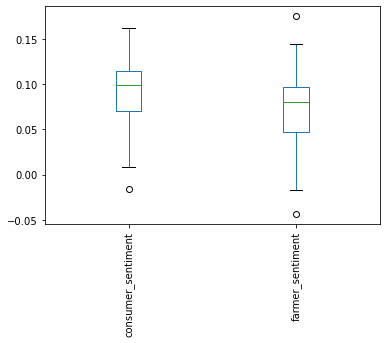

In [11]:
allSentiment[['consumer_sentiment', 'farmer_sentiment']].plot(kind='box', rot=90)

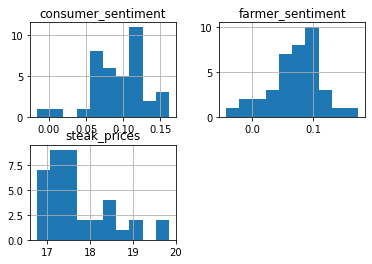

In [12]:
allSentiment.hist();

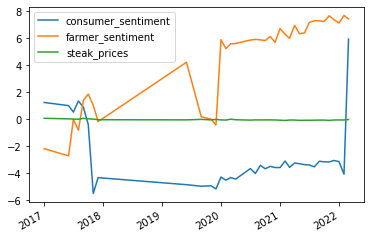

In [13]:
allSentiment.pct_change().cumsum().plot();

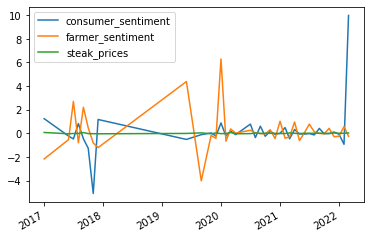

In [14]:
allSentiment.pct_change().plot();

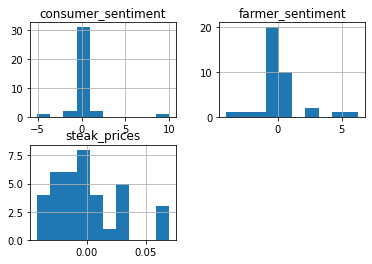

In [15]:
allSentiment.pct_change().hist();

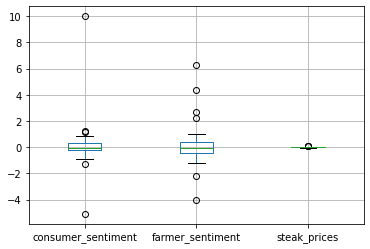

In [16]:
allSentiment.pct_change().boxplot();